In [1]:
import numpy as np
import matplotlib.pyplot as plt

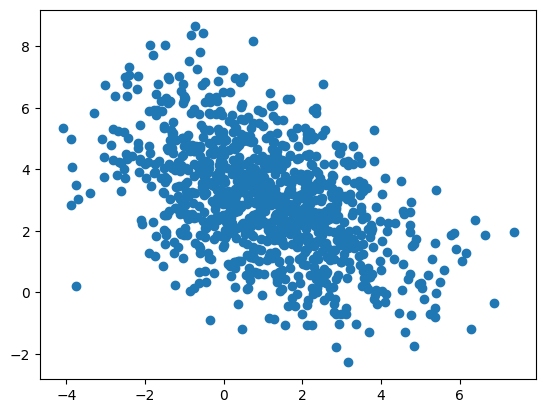

In [2]:
mu = np.array([1,3])
sigma = np.array([[3.5, -1.8], [-1.8,3.5]])
origData = np.random.multivariate_normal(mu, sigma, size=(1000))
plt.scatter(*origData.T)
plt.show()

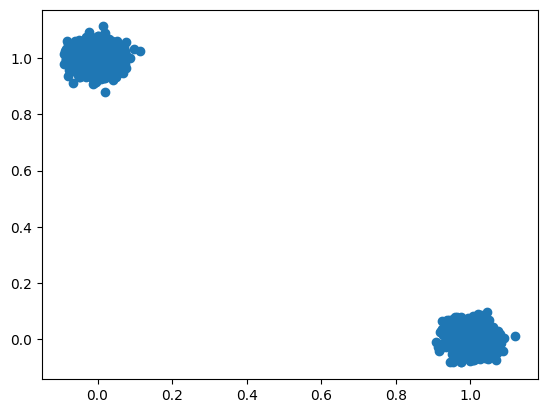

In [3]:
sigma = np.array([[0.001,0], [0,0.001]])

mu = np.array([1,0])
origData1 = np.random.multivariate_normal(mu, sigma, size=(1000))

mu = np.array([0,1])
origData2 = np.random.multivariate_normal(mu, sigma, size=(1000))

origData = np.vstack([origData1, origData2])
plt.scatter(*origData.T)
plt.show()

# METHOD 1
## Check longest length of forward and back similar vectors then normalize

In [ ]:
data = origData.copy()
data = data-np.mean(data, axis=0)

lim = 1.1*np.max(np.abs(data))
plt.xlim((-lim, lim))
plt.ylim((-lim, lim))
plt.scatter(*data.T)
plt.show()

numComponents = 10
numItems, originalDimension = data.shape
components = np.zeros(shape=(numComponents, originalDimension))
coefficients = np.zeros(shape=(numItems, numComponents))
SUBSET_FRAC = 0.5

for componentIndex in range(numComponents):
    covMatrix = np.cov(data.T)
    eigenValues, eigenVectors = np.linalg.eig(covMatrix)
    maxEigenValueIndex = np.argmax(eigenValues)
    maxVarianceDirection = eigenVectors[:, maxEigenValueIndex]

    # Check similarity for forward vector
    similarities = np.dot(data, maxVarianceDirection) / np.linalg.norm(data, axis=1)
    argsortedSimilarities = np.argsort(similarities)

    mostForwardAlignedVectorIndices = argsortedSimilarities[-int(SUBSET_FRAC*len(data)):]
    mostForwardAlignedVectors = data[mostForwardAlignedVectorIndices]
    mostForwardAlignedVectorsAverageLength = np.average(np.linalg.norm(mostForwardAlignedVectors, axis=1))

    # Check similarity for backward vector
    mostBackwardAlignedVectorIndices = np.argsort(similarities)[:int(SUBSET_FRAC*len(data))]
    mostBackwardAlignedVectors = data[mostBackwardAlignedVectorIndices]
    mostBackwardAlignedVectorsAverageLength = np.average(np.linalg.norm(mostBackwardAlignedVectors, axis=1))

    if mostForwardAlignedVectorsAverageLength > mostBackwardAlignedVectorsAverageLength:
        mostAlignedDataIndices = mostForwardAlignedVectorIndices
        componentDirection = maxVarianceDirection
    else:
        mostAlignedDataIndices = mostBackwardAlignedVectorIndices
        componentDirection = -maxVarianceDirection
    
    mostAlignedVectors = data[mostAlignedDataIndices]
    component = np.average(np.linalg.norm(mostAlignedVectors, axis=1), axis=0) * componentDirection

    # plt.scatter(*data.T)
    fig, (ax0, ax1) = plt.subplots(figsize=(14,6), ncols=2)
    ax0.set_xlim((-lim, lim))
    ax0.set_ylim((-lim, lim))
    ax0.scatter(*np.delete(data, mostAlignedDataIndices, axis=0).T)
    ax0.scatter(*data[mostAlignedDataIndices].T, color="r")
    ax0.arrow(0,0,*maxVarianceDirection, color="k")
    ax0.arrow(0,0,*component, color="g", linestyle="--")
    ax0.set_title(f"Average Dist: {np.average(np.linalg.norm(data, axis=1))}")

    data[mostAlignedDataIndices] -= component

    ax1.set_xlim((-lim, lim))
    ax1.set_ylim((-lim, lim))
    ax1.scatter(*np.delete(data, mostAlignedDataIndices, axis=0).T)
    ax1.scatter(*data[mostAlignedDataIndices].T, color="r")
    ax1.arrow(0,0,*maxVarianceDirection, color="k")
    ax1.arrow(0,0,*component, color="g", linestyle="--")
    ax1.set_title(f"Average Dist: {np.average(np.linalg.norm(data, axis=1))}")
    plt.show()


# Method 2
## Get most similar vector, select most similar to that, repeat until stable

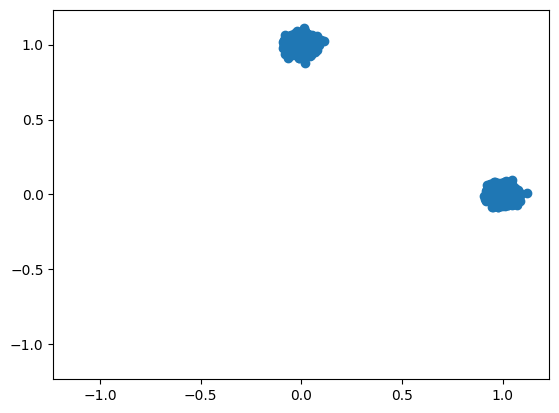

[ 0.46330199 -0.46329815]
[ 0.500316   -0.50027184]


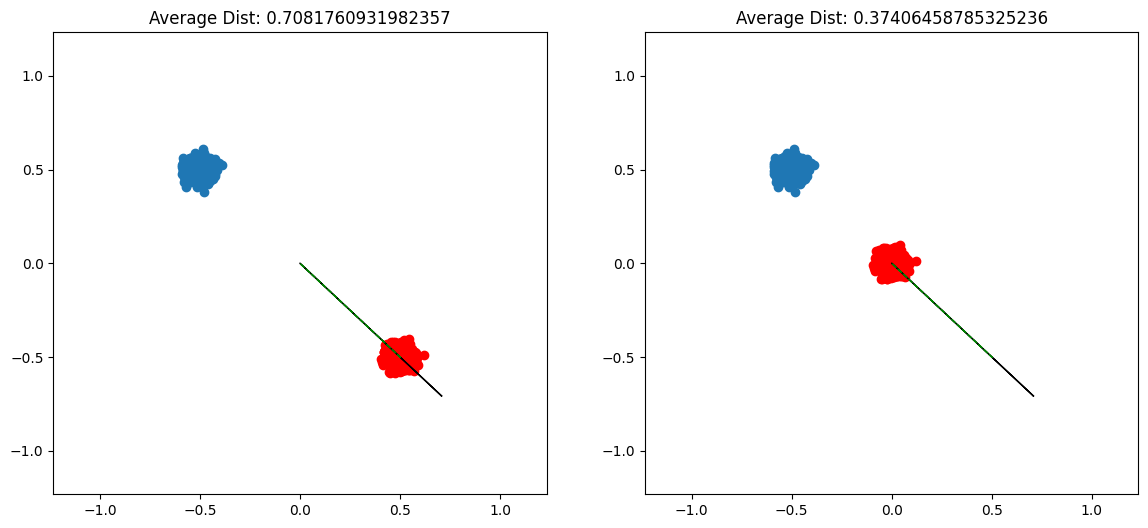

[ 0.21314399 -0.21316223]
[ 0.250158   -0.25013592]


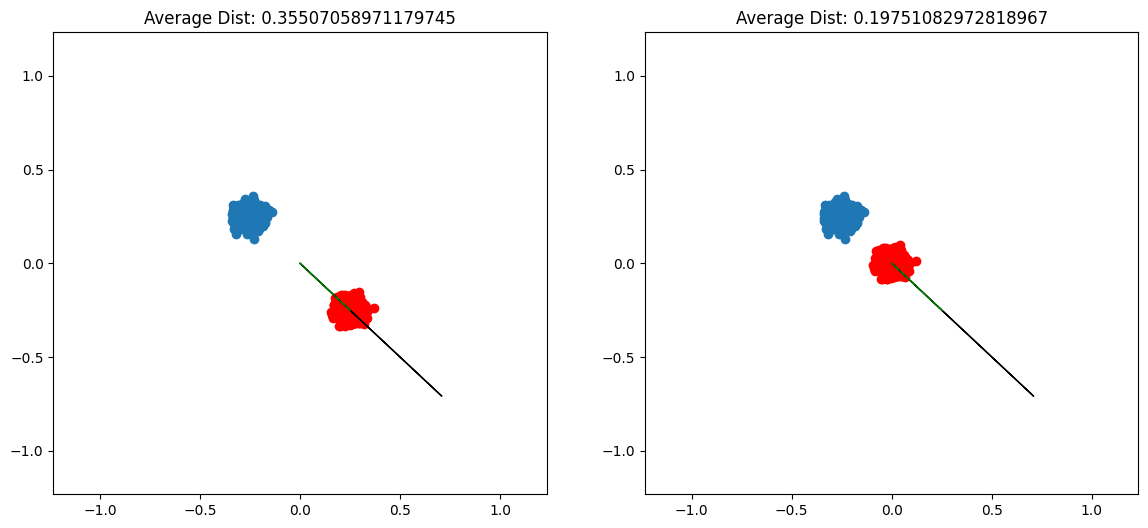

[ 0.14394771 -0.14384526]
[ 0.125079   -0.12506796]


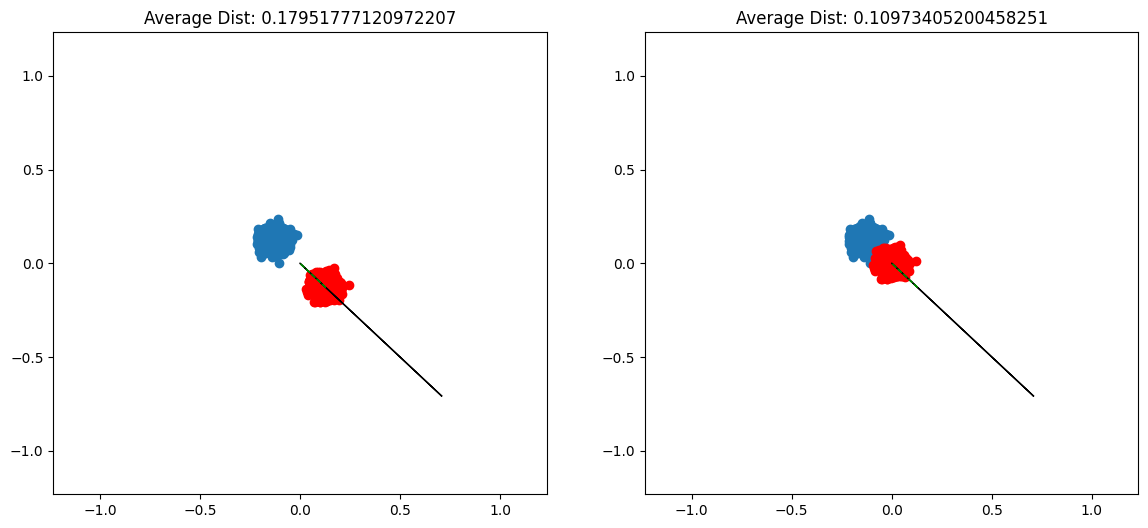

[ 0.08140821 -0.08131128]
[ 0.0625592 -0.0625249]


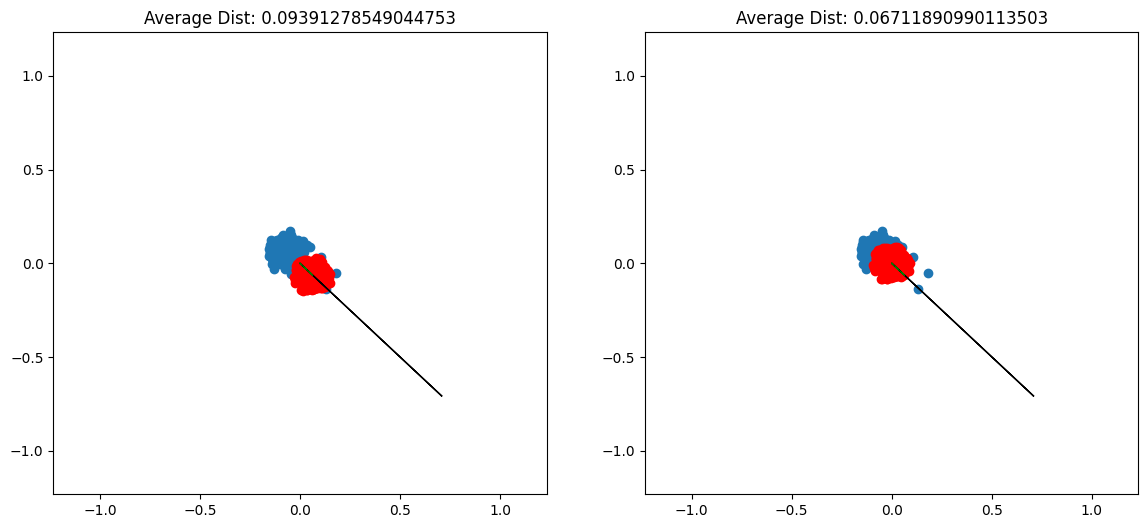

[ 0.01786573 -0.01757766]


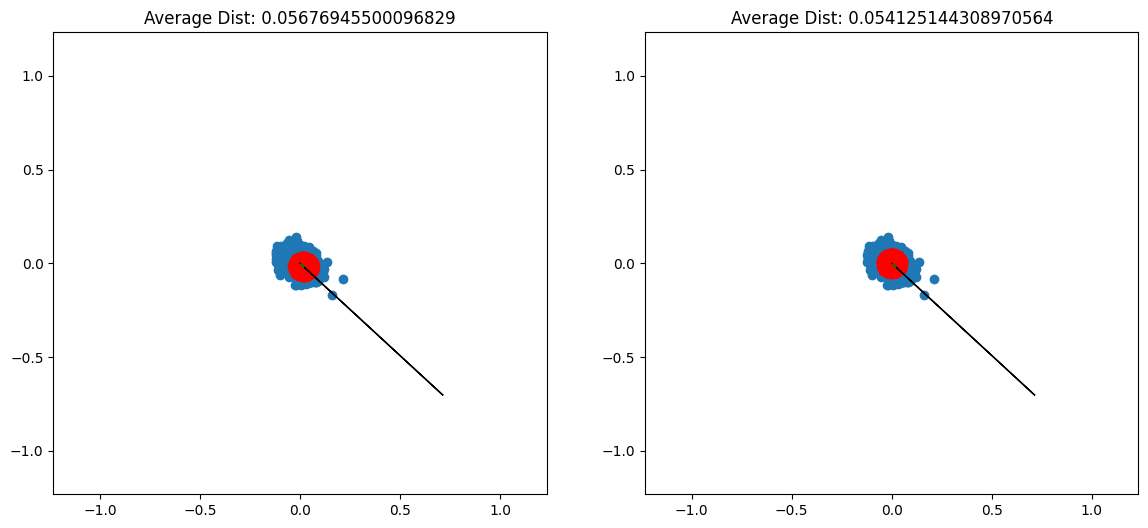

[-0.05185041  0.05124873]
[-0.02803989  0.02855799]


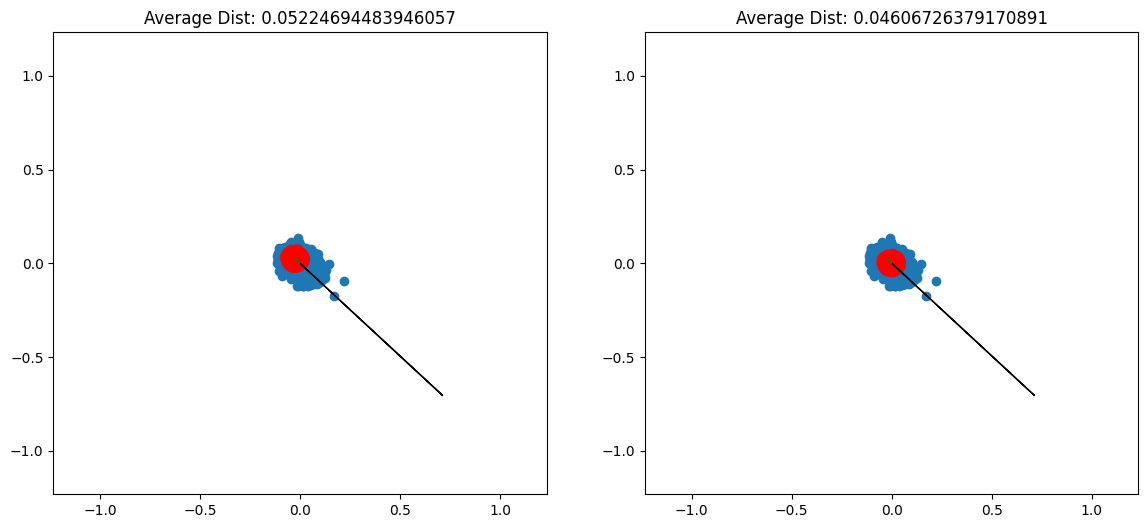

[-0.02067146  0.01933549]
[-0.01220298  0.01180661]


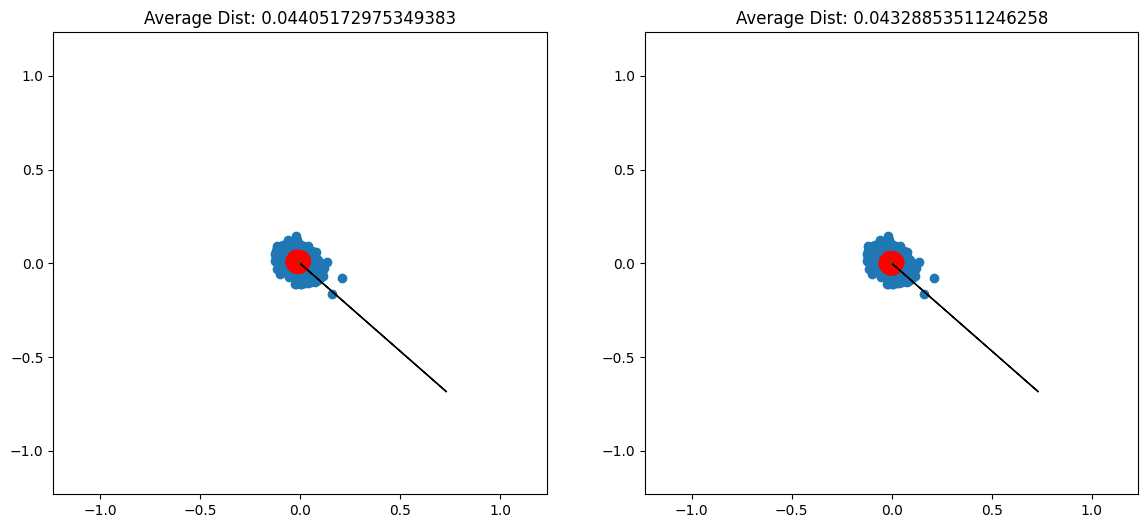

[-0.08503442  0.07858426]
[-0.02162328  0.02018681]
[-0.01007994  0.00971974]


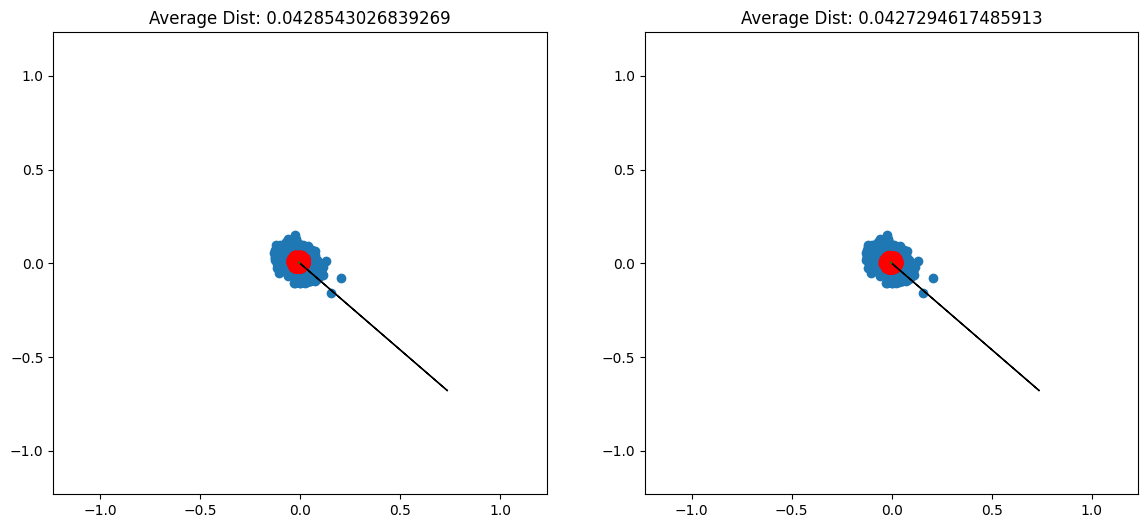

[ 0.01029761 -0.00951277]


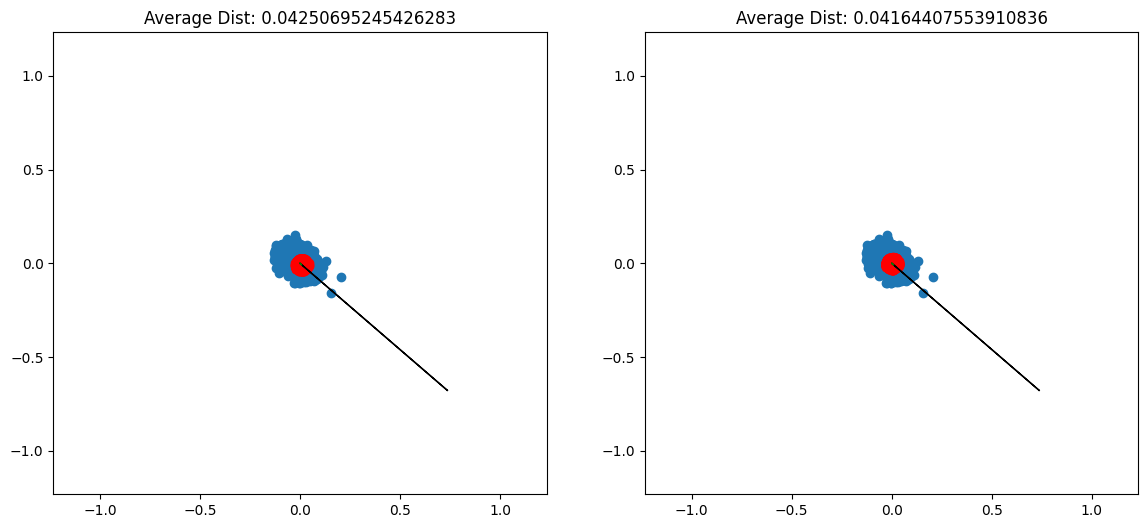

[ 0.00672983 -0.00617629]


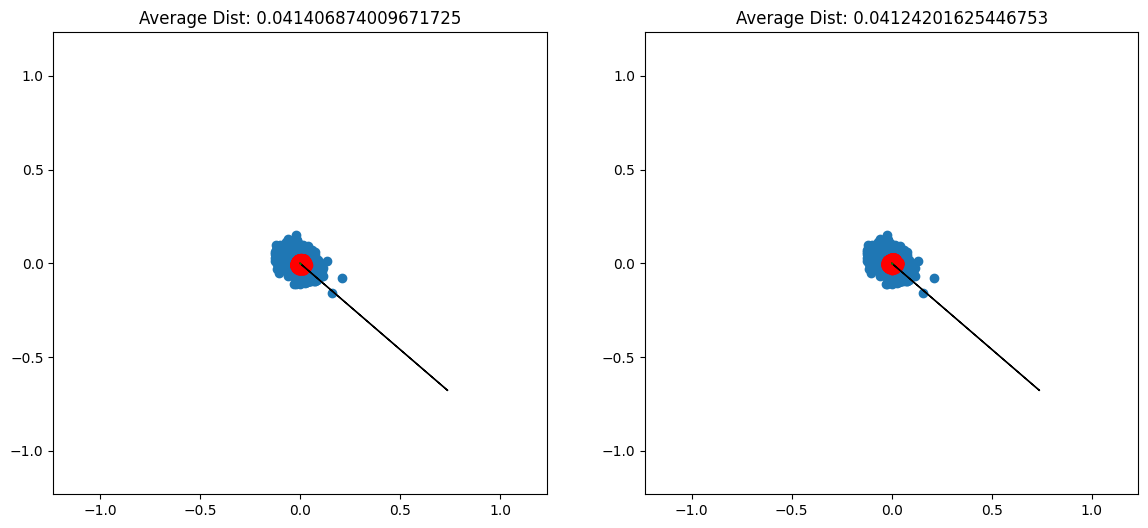

In [7]:
data = origData.copy()

lim = 1.1*np.max(np.abs(data))
plt.xlim((-lim, lim))
plt.ylim((-lim, lim))
plt.scatter(*data.T)
plt.show()

numComponents = 10
numItems, originalDimension = data.shape
components = np.zeros(shape=(numComponents, originalDimension))
coefficients = np.zeros(shape=(numItems, numComponents))
SUBSET_FRAC = 0.5
COMPONENT_TOLERANCE = 0.01

totalAdjustment = np.zeros(shape=(originalDimension))

for componentIndex in range(numComponents):
    totalAdjustment += np.mean(data,axis=0)
    data = data-np.mean(data, axis=0)

    covMatrix = np.cov(data.T)
    eigenValues, eigenVectors = np.linalg.eig(covMatrix)
    maxEigenValueIndex = np.argmax(eigenValues)
    maxVarianceDirection = eigenVectors[:, maxEigenValueIndex]

    # Check absolute cosine for similarity to maxVarianceDirection
    maxVarianceSimilarities = np.abs(np.dot(data, maxVarianceDirection) / np.linalg.norm(data, axis=1))
    maxVarianceSimilarIndex = np.argmax(maxVarianceSimilarities)

    proposedComponent = data[maxVarianceSimilarIndex]
    currentComponentShift = COMPONENT_TOLERANCE+1
    while currentComponentShift > COMPONENT_TOLERANCE:
        print(proposedComponent)
        proposedComponentSimilarities = np.linalg.norm(data - proposedComponent, axis=1)
        proposedComponentMostSimilarIndices = np.argsort(proposedComponentSimilarities)[:int(SUBSET_FRAC*len(data))]
        proposedComponentMostSimilarVectors = data[proposedComponentMostSimilarIndices]
        nextProposedComponent = np.average(proposedComponentMostSimilarVectors, axis=0)
        currentComponentShift = np.linalg.norm(nextProposedComponent - proposedComponent)
        proposedComponent = nextProposedComponent

    # plt.scatter(*data.T)
    fig, (ax0, ax1) = plt.subplots(figsize=(14,6), ncols=2)
    ax0.set_xlim((-lim, lim))
    ax0.set_ylim((-lim, lim))
    ax0.scatter(*np.delete(data, proposedComponentMostSimilarIndices, axis=0).T)
    ax0.scatter(*data[proposedComponentMostSimilarIndices].T, color="r")
    ax0.arrow(0,0,*maxVarianceDirection, color="k")
    ax0.arrow(0,0,*proposedComponent, color="g", linestyle="--")
    ax0.set_title(f"Average Dist: {np.average(np.linalg.norm(data, axis=1))}")

    data[proposedComponentMostSimilarIndices] -= proposedComponent

    ax1.set_xlim((-lim, lim))
    ax1.set_ylim((-lim, lim))
    ax1.scatter(*np.delete(data, proposedComponentMostSimilarIndices, axis=0).T)
    ax1.scatter(*data[proposedComponentMostSimilarIndices].T, color="r")
    ax1.arrow(0,0,*maxVarianceDirection, color="k")
    ax1.arrow(0,0,*proposedComponent, color="g", linestyle="--")
    ax1.set_title(f"Average Dist: {np.average(np.linalg.norm(data, axis=1))}")
    plt.show()
